In [1]:
!pip install keras

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# from tensorflow.keras.backend import set_session
import tensorflow as tf
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
# config.log_device_placement = True  # to log device placement (on which device the operation ran)sess = tf.Session(config=config)set_session(sess)
# sess = tf.Session(config=config)
# set_session(sess) 

In [3]:
import tensorflow as tf
import keras.backend.tensorflow_backend as ktf


def get_session(gpu_fraction=0.9):
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction,
                                allow_growth=True)
    return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


ktf.set_session(get_session())

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
#from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.applications import InceptionV3
#from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam as Adam
from tensorflow.keras.models import load_model

In [3]:
base_model= InceptionV3(include_top=False, weights='../inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5', input_shape=(299,299,3))
# model=load_model("InceptionV34.hdf5")

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.layers import Dropout
model= Sequential()
model.add(base_model)
model.add(Conv2D(64, (3, 3), activation = 'relu'))
#model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
#model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
#model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))
model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))


In [11]:
base_model.summary()
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization_v1[0][0]     
__________________________________________________________________________________________________
conv2d_1 (

In [7]:
from tensorflow.keras import optimizers
from keras_preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale = 1./255,
                                     rotation_range=10,  
                                     zoom_range = 0.1, 
                                     width_shift_range=0.2,  height_shift_range=0.2) 

In [8]:
train_data= train_generator.flow_from_directory(
                                                batch_size=256,directory="/raid/Data/Master_Dataset/elvin/final_mix/train/",
                                                shuffle=True,class_mode="binary",target_size=(299,299))

Found 948603 images belonging to 2 classes.


In [9]:
train_data.class_indices

{'fake': 0, 'real': 1}

In [10]:
test_generator=ImageDataGenerator(rescale = 1./255)

In [11]:
val_data= test_generator.flow_from_directory(
                                              directory="/raid/Data/Master_Dataset/elvin/final_mix/validation/",
                                              shuffle=True,batch_size=256,class_mode="binary",target_size=(299,299))

Found 518144 images belonging to 2 classes.


In [12]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=.5, min_lr=0.0001)

In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint


# # Save the model with best weights
# checkpointer = ModelCheckpoint('Xceptionbestweights1.hdf5', verbose=1,save_best_only=True)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [15]:
from tensorflow.keras.utils import multi_gpu_model

In [17]:
# parallel_model = multi_gpu_model(model, gpus=3)
# parallel_model.compile(loss='binary_crossentropy',
#                            optimizer=Adam(lr=0.001),metrics=["accuracy"])
# #model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
# parallel_model.fit_generator(generator=train_data,
#                             steps_per_epoch=train_data.samples//train_data.batch_size,
#                             validation_data=val_data,
#                             verbose=1,
#                             validation_steps=val_data.samples//val_data.batch_size,
#                             epochs=3,callbacks=[learning_rate_reduction])

In [16]:
from matplotlib import pyplot
import sys

In [18]:
def summarize_diagnostics(history,epoch):
    # plot loss
    pyplot.subplot(121)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    pyplot.ylabel('Loss')
    pyplot.xlabel('Epochs')

    # plot accuracy
    pyplot.subplot(122)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['acc'], color='blue', label='train')
    pyplot.plot(history.history['val_acc'], color='orange', label='test')
    pyplot.ylabel('Accuracy')
    pyplot.xlabel('Epochs')

    pyplot.subplots_adjust(top=0.92, bottom=0.2, left=0.0, right=2.5, hspace=0.25,
                    wspace=0.25)
    pyplot.show()    


    #     pyplot.subplot(213)
    # 	pyplot.title('Classification Accuracy')
    # 	pyplot.plot(history.history['accuracy'], color='blue', label='train')
    # 	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename +'InceptionNewAdam'+str(epoch)+ '_plot.png')

In [19]:
# from tensorflow.keras.utils import multi_gpu_model
# #for y in [1,2,3,4,5,6,7,9,14]:
# for y in [2,4,6]:
#     try:
#         location="BestWeights_epoch"+str(y)+ ".hdf5"
#         checkpointer = ModelCheckpoint(location, monitor='val_acc', verbose=1, save_best_only=True, mode='max')    
#         final_location=[]
#         location=[]
#         model= Sequential()
#         model.add(base_model)
#         model.add(Conv2D(64, (3, 3), activation = 'relu'))
#         #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
#         #model.add(MaxPooling2D(pool_size = (2, 2)))
#         model.add(Dropout(0.40))
#         model.add(Conv2D(64, (3, 3), activation = 'relu'))
#         #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
#         model.add(MaxPooling2D(pool_size = (2, 2)))
#         model.add(Dropout(0.40))
#         model.add(Flatten())
#         model.add(Dense(512,activation='relu'))
#         model.add(Dropout(0.4))
#         model.add(Dense(1, activation='sigmoid'))
#     # model.add(Conv2D(512, (3, 3), activation = 'relu'))



#         #parallel_model = multi_gpu_model(model, gpus=2)
#         model.compile(loss='binary_crossentropy',
#                                optimizer=Adam(lr=0.001),metrics=["accuracy"])
#     #model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
#         history_model=model.fit_generator(generator=train_data,
#                                 steps_per_epoch=train_data.samples//train_data.batch_size,
#                                 validation_data=val_data,
#                                 verbose=1,
#                                 validation_steps=val_data.samples//val_data.batch_size,
#                                 epochs=y,callbacks=[learning_rate_reduction,es,checkpointer])
#         model.save("InceptionV3"+str(y)+".hdf5")
#         summarize_diagnostics(history_model,y)
#         loss=history_model.history['loss']
#         acc=history_model.history['acc']
#         valacc=history_model.history['val_acc']
#         valloss=history_model.history['val_loss']
#         location = [y,loss,acc,valacc, valloss]
#         final_location.append(location)
#         save1 = pd.DataFrame(final_location,columns=['epochs','loss','acc','valacc','valloss'])
#         save1.to_csv('InceptionV3'+str(y)+'.csv')
#     except Exception as e: 
#         print(e)
#         continue

In [ ]:
from tensorflow.keras.utils import multi_gpu_model
#for y in [1,2,3,4,5,6,7,9,14]:
for y in [2,4,6]:
    try:
        location="BestWeights_epoch"+str(y)+ ".hdf5"
        checkpointer = ModelCheckpoint(location, monitor='val_acc', verbose=1, save_best_only=True, mode='max')    
        final_location=[]
        location=[]
        model= Sequential()
        model.add(base_model)
        model.add(Conv2D(64, (3, 3), activation = 'relu'))
        #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
        #model.add(MaxPooling2D(pool_size = (2, 2)))
        model.add(Dropout(0.40))
        model.add(Conv2D(64, (3, 3), activation = 'relu'))
        #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
        model.add(MaxPooling2D(pool_size = (2, 2)))
        model.add(Dropout(0.40))
        model.add(Flatten())
        model.add(Dense(512,activation='relu'))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))
    # model.add(Conv2D(512, (3, 3), activation = 'relu'))



        parallel_model = multi_gpu_model(model, gpus=2)
        parallel_model.compile(loss='binary_crossentropy',
                               optimizer=Adam(lr=0.001),metrics=["accuracy"])
    #model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
        history_model=parallel_model.fit_generator(generator=train_data,
                                steps_per_epoch=train_data.samples//train_data.batch_size,
                                validation_data=val_data,
                                verbose=1,
                                validation_steps=val_data.samples//val_data.batch_size,
                                epochs=y,callbacks=[learning_rate_reduction,es,checkpointer])
        model.save("InceptionV3"+str(y)+".hdf5")
        summarize_diagnostics(history_model,y)
        loss=history_model.history['loss']
        acc=history_model.history['acc']
        valacc=history_model.history['val_acc']
        valloss=history_model.history['val_loss']
        location = [y,loss,acc,valacc, valloss]
        final_location.append(location)
        save1 = pd.DataFrame(final_location,columns=['epochs','loss','acc','valacc','valloss'])
        save1.to_csv('InceptionV3'+str(y)+'.csv')
    except Exception as e: 
        print(e)
        continue

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/2
2024/2024 [==============================] - 2667s 1s/step - loss: 0.3353 - acc: 0.8527

Epoch 00001: val_acc improved from -inf to 0.85271, saving model to BestWeights_epoch2.hdf5
3706/3706 [==============================] - 22312s 6s/step - loss: 0.2178 - acc: 0.9025 - val_loss: 0.3353 - val_acc: 0.8527
Epoch 2/2
2024/2024 [==============================] - 2382s 1s/step - loss: 0.7137 - acc: 0.7810

Epoch 00002: val_acc did not improve from 0.85271
3706/3706 [==============================] - 22258s 6s/step - loss: 0.0940 - acc: 0.9631 - val_loss: 0.7137 - val_acc: 0.7810
Epoch 1/4
2024/2024 [==============================] - 2335s 1s/step - loss: 1.7733 - acc: 0.6995

Epoch 00001: val_acc improved from -inf to 0.69949, saving model to BestWeights_epoch4.hdf5
3706/3706 [==============================] - 19461s 5s

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Epoch 1/6
2024/2024 [==============================] - 2682s 1s/step - loss: 0.4777 - acc: 0.8891

Epoch 00001: val_acc improved from -inf to 0.88907, saving model to BestWeights_epoch6.hdf5
3706/3706 [==============================] - 23674s 6s/step - loss: 0.0393 - acc: 0.9856 - val_loss: 0.4777 - val_acc: 0.8891
Epoch 2/6
1168/3706 [========>.....................] - ETA: 3:57:41 - loss: 0.0337 - acc: 0.9877

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/6
2024/2024 [==============================] - 2221s 1s/step - loss: 0.3579 - acc: 0.8978

Epoch 00001: val_acc improved from -inf to 0.89779, saving model to BestWeights_epoch6.hdf5
3706/3706 [==============================] - 20012s 5s/step - loss: 0.0387 - acc: 0.9856 - val_loss: 0.3579 - val_acc: 0.8978
Epoch 2/6
2024/2024 [==============================] - 2218s 1s/step - loss: 0.5214 - acc: 0.8852

Epoch 00002: val_acc did not improve from 0.89779
3706/3706 [==============================] - 19157s 5s/step - loss: 0.0342 - acc: 0.9872 - val_loss: 0.5214 - val_acc: 0.8852
Epoch 3/6
2024/2024 [==============================] - 2265s 1s/step - loss: 0.4502 - acc: 0.8858

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.000500000023748

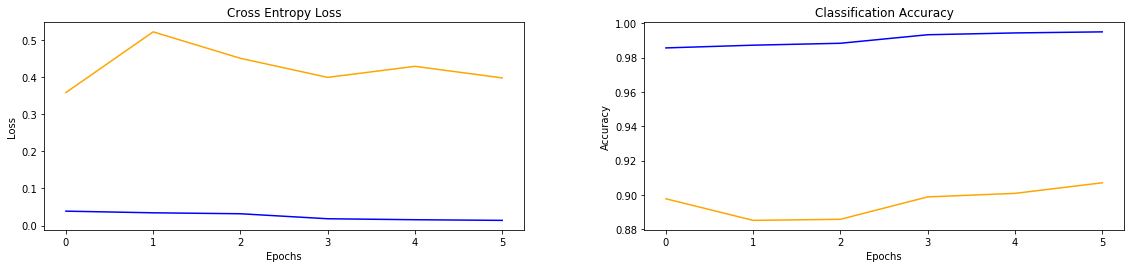

<Figure size 432x288 with 0 Axes>

In [19]:
from tensorflow.keras.utils import multi_gpu_model
#for y in [1,2,3,4,5,6,7,9,14]:
for y in [6]:
    try:
        location="BestWeights_epoch"+str(y)+ ".hdf5"
        checkpointer = ModelCheckpoint(location, monitor='val_acc', verbose=1, save_best_only=True, mode='max')    
        final_location=[]
        location=[]
#         model= Sequential()
#         model.add(base_model)
#         model.add(Conv2D(64, (3, 3), activation = 'relu'))
#         #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
#         #model.add(MaxPooling2D(pool_size = (2, 2)))
#         model.add(Dropout(0.40))
#         model.add(Conv2D(64, (3, 3), activation = 'relu'))
#         #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
#         model.add(MaxPooling2D(pool_size = (2, 2)))
#         model.add(Dropout(0.40))
#         model.add(Flatten())
#         model.add(Dense(512,activation='relu'))
#         model.add(Dropout(0.4))
#         model.add(Dense(1, activation='sigmoid'))
    # model.add(Conv2D(512, (3, 3), activation = 'relu'))

        model=load_model("InceptionV34.hdf5")

        parallel_model = multi_gpu_model(model, gpus=2)
        parallel_model.compile(loss='binary_crossentropy',
                               optimizer=Adam(lr=0.001),metrics=["accuracy"])
    #model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
        history_model=parallel_model.fit_generator(generator=train_data,
                                steps_per_epoch=train_data.samples//train_data.batch_size,
                                validation_data=val_data,
                                verbose=1,
                                validation_steps=val_data.samples//val_data.batch_size,
                                epochs=y,callbacks=[learning_rate_reduction,es,checkpointer])
        model.save("InceptionV3"+str(y)+".hdf5")
        summarize_diagnostics(history_model,y)
        loss=history_model.history['loss']
        acc=history_model.history['acc']
        valacc=history_model.history['val_acc']
        valloss=history_model.history['val_loss']
        location = [y,loss,acc,valacc, valloss]
        final_location.append(location)
        save1 = pd.DataFrame(final_location,columns=['epochs','loss','acc','valacc','valloss'])
        save1.to_csv('InceptionV3'+str(y)+'.csv')
    except Exception as e: 
        print(e)
        continue